# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [3]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))
    
  return np.asarray(f_x).reshape(len(x1), len(x2))

In [4]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

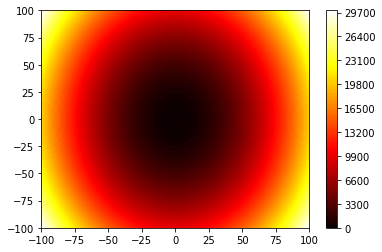

In [5]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
f was the following:
$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7 \\
$$

\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &=  2x_1 + 0.3*3*\pi * \sin(3\pi x_1)  \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2 + 0.4*4*\pi * \sin(4\pi x_2)  \\
\end{align*}

In [6]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
  #------
  # PLEASE FILL IN:
  grad_x1 = 2*x[:,0] - 0.3*3*np.pi*np.sin(3*np.pi*x[:,0])
  grad_x2 = 4*x[:,1] - 0.4*4*np.pi*np.sin(4*np.pi*x[:,1])
  grad = np.vstack((grad_x1, grad_x2)).T
  #------
  return grad

In [7]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
  def __init__(self, grad, step_size=0.1):
    self.grad = grad
    self.step_size = step_size    

  def step(self, x_old):
    #------
    # PLEASE FILL IN:
    # gradient descent step
    x_new = x_old - self.step_size*self.grad(x_old)
    #------
    return x_new

In [8]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[90., -90.]])
  x_opt = x
  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

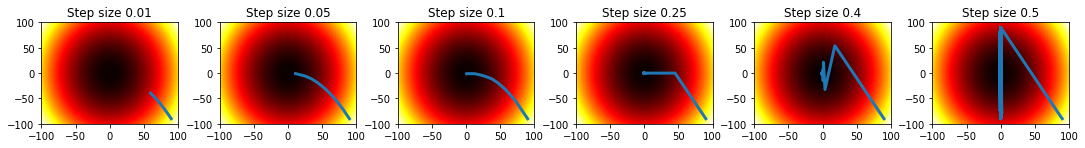

In [9]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  # take the step size
  step_size = step_sizes[i]
  # init the GD
  gd = GradientDescent(grad, step_size=step_size)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: 
| Step size | Analysis |
|-----------|----------|
| 0.01    | The algorithm could not converge to minimum in the epoch limit. This can be explained by the fact that the step size is too small. |
| 0.05 | It converges to the minimum in nice way in the sense that the function value is decreasing and does not show any oscillations. |
| 0.1 | It converges to the minimum in nice way in the sense that the function value is decreasing and does not show any oscillations as in the 0.05 step size |
| 0.25| It converges to the minimum in nice way in the sense that the function value is decreasing and does not show any oscillations but it has sharp changes compared to 0.05 and 0.1 step sizes. |
| 0.4 | It converges with sharp changes to minimum however when the function value is close to the minimum, it oscillates around the minimum. |
| 0.5 | It converges with sharp changes to minimum however it does not converge to minimum and goes out of the minimum area, this can be explained by the fact that the step size is too large. |


**Question 3 (0-0.5pt)**: What could we do to increase the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: 
| Step size | Comment |
|-----------|----------|
| 0.01    | We can increase the number of epochs to increase the convergence as the problem is that the algorithm does not converge to the minimum in the epoch limit but is in the path that can converge to the minimum. |
| 0.5 | We can decrease the step size to increase the convergence as the problem is that the algorithm does not converge to the minimum and goes out of the minimum area. |

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** PLEASE FILL IN

*Input:* PLEASE FILL IN

1. PLEASE FILL IN
2. ...

In [ ]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
  def __init__(self, obj_fun, step_size):
    self.obj_fun = obj_fun
    # PLEASE FILL IN: You will need some other variables
    self.step_size = step_size
  
  ## PLEASE FILL IN IF NECESSARY
  ## Please remember that for the DFO you may need extra functions.
  #def ...

  # This function MUST be implemented.
  # No additional arguments here!
  def step(self, x_old):
    ## PLEASE FILL IN.
    #...
    #x_new = ...
    return x_new

In [ ]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 20 # the number of epochs (you may change it!)

## PLEASE FILL IN
## Here all hyperparameters go.
## Please analyze at least one hyperparameter in a similar manner to the 
## step size in the GD algorithm.
# step sizes from GD cell
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

## plotting the convergence of the DFO
## Please uncomment the two lines below, but please provide the number of axes (replace HERE appriopriately)
# fig_dfo, axs = plt.subplots(1, HERE, figsize=(15, 2))
# fig_dfo.tight_layout()

# the for-loop should go over (at least one) parameter(s) (replace HERE appriopriately)
# and uncomment the line below
for i in range(len(step_sizes)):

  ## PLEASE FILL IN
  # ...
  dfo = DFO(f, step_size=step_sizes[i])
  # plot the convergence
  # please change the title accordingly!
  plot_optimization_process(axs[i], optimizer=dfo, title='')

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** PLEASE FILL IN

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: PLEASE FILL IN

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: PLEASE FILL IN